In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
npy_dir = '../../../dataset/image_formation/20231007/npy_data'

# sample_pts = np.array([[10 + i*120, 50 + j*51] for j in range(10) for i in range(8)])
sample_pts = np.array([[10 + i*20, 50 + j*20] for j in range(24) for i in range(43)])        
sample_pts_flatt = np.array([[sample_pts[i,0]+sample_pts[i,1]*890] for i in range(sample_pts.shape[0])]).squeeze()

wvl_list = np.array([430, 600, 610, 620, 640, 650, 660])
new_wvls = np.arange(430,661,5)
calibration_wvls = np.array([0,-13,-11,-9,-5,-3,-1])

cam_H, cam_W = 580, 890
idx_list = np.array([3 + 8*i for i in range(10)])

depth_arange = np.arange(600,901,1)

## Max datas & Peak illum index

In [8]:
# PDG graph for each wavelength
max_data_front = np.load(os.path.join(npy_dir, 'max_data_front.npy'))
max_data_mid = np.load(os.path.join(npy_dir, 'max_data_mid.npy'))
max_data_mid2 = np.load(os.path.join(npy_dir, 'max_data_mid2.npy'))
max_data_mid3 = np.load(os.path.join(npy_dir, 'max_data_mid3.npy'))
max_data_back = np.load(os.path.join(npy_dir, 'max_data_back.npy'))

In [4]:
# peak illumination index for 5 different depth
front_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_front.npy'))
mid_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid.npy'))
mid2_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid2.npy'))
mid3_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_mid3.npy'))
back_peak_illum_idx = np.load(os.path.join(npy_dir, 'peak_illum_idx_back.npy'))

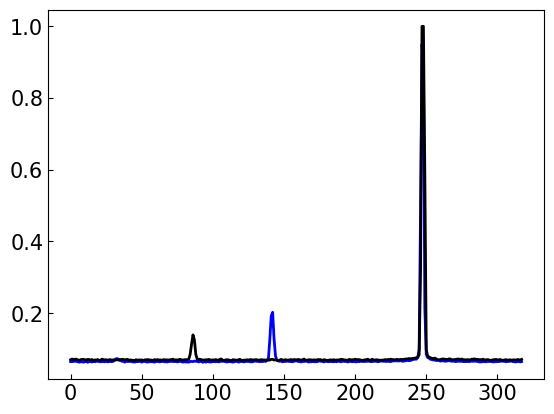

In [111]:
fig, ax = plt.subplots()
plt.plot(max_data_mid2[0,:,241010], linewidth = 2, c = 'blue')
plt.plot(max_data_mid2[-1,:,241010], linewidth = 2, c = 'black')

plt.grid(linestyle = '--', c = 'white')
ax.tick_params(axis='both', which='major', labelsize=15, direction = 'in')
plt.savefig('minus_order.svg')

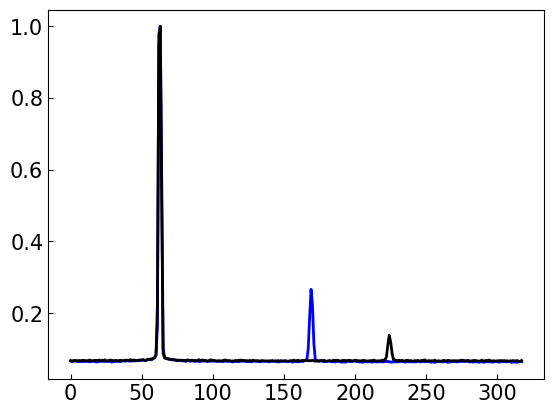

In [110]:
fig, ax = plt.subplots()
plt.plot(max_data_mid2[0,:,240350], linewidth = 2, c = 'blue')
plt.plot(max_data_mid2[-1,:,240350], linewidth = 2, c = 'black')
plt.grid(linestyle = '--', c = 'white')
ax.tick_params(axis='both', which='major', labelsize=15, direction = 'in')
plt.savefig('plus_order.svg')

In [ ]:
# for i in range(5):
#     fig, ax = plt.subplots()
#     ax.tick_params(axis='both', which='major', labelsize=15, direction = 'in')
#     plt.imshow(depth[i].reshape(580,890), vmax = 1050, vmin = 350, cmap = 'magma'), plt.colorbar()
#     plt.savefig('depth_%02d.svg'%i)

In [32]:
rainbow_colors = ['red', 'orange', 'peru', 'green', 'blue', 'indigo', 'violet']

In [34]:
# import numpy as np
# import matplotlib.pyplot as plt

# illum = np.arange(0, 318, 1)

# for p in range(10000,10001):
#     start_idx = 0
#     end_idx = 318
#     # Sample data (replace with your own data)
#     x = illum[start_idx: end_idx]
#     y2_00 = max_data_mid2[0, start_idx: end_idx, p]
#     y1_00 = max_data_mid2[0, start_idx: end_idx, p]

#     y2_01 = max_data_mid2[1, start_idx: end_idx, p]
#     y1_01 = max_data_mid2[1, start_idx: end_idx, p]

#     y2_02 = max_data_mid2[2, start_idx: end_idx, p]
#     y1_02 = max_data_mid2[2, start_idx: end_idx, p]

#     y2_03 = max_data_mid2[3, start_idx: end_idx, p]
#     y1_03 = max_data_mid2[3, start_idx: end_idx, p]

#     y2_04 = max_data_mid2[4, start_idx: end_idx, p]
#     y1_04 = max_data_mid2[4, start_idx: end_idx, p]

#     y2_05 = max_data_mid2[5, start_idx: end_idx, p]
#     y1_05 = max_data_mid2[5, start_idx: end_idx, p]

#     y2_06 = max_data_mid2[6, start_idx: end_idx, p]
#     y1_06 = max_data_mid2[6, start_idx: end_idx, p]

#     # Create a figure and two subplots (stacked vertically)
#     fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 5))

#     # Plot the data in both subplots
#     ax1.plot(x, y1_00, 'g', c = rainbow_colors[0], linewidth = 2.)  # top subplot (for the high values)
#     ax2.plot(x, y2_00, 'b', c = rainbow_colors[0], linewidth = 2.) # bottom subplot (for the low values)

#     ax1.plot(x, y1_01, 'g', c = rainbow_colors[1], linewidth = 2.)  # top subplot (for the high values)
#     ax2.plot(x, y2_01, 'b', c = rainbow_colors[1], linewidth = 2.) # bottom subplot (for the low values)

#     ax1.plot(x, y1_02, 'g', c = rainbow_colors[2], linewidth = 2.)  # top subplot (for the high values)
#     ax2.plot(x, y2_02, 'b', c = rainbow_colors[2], linewidth = 2.) # bottom subplot (for the low values)

#     ax1.plot(x, y1_03, 'g', c = rainbow_colors[3], linewidth = 2.)  # top subplot (for the high values)
#     ax2.plot(x, y2_03, 'b', c = rainbow_colors[3], linewidth = 2.) # bottom subplot (for the low values)
    
#     ax1.plot(x, y1_04, 'g', c = rainbow_colors[4], linewidth = 2.)  # top subplot (for the high values)
#     ax2.plot(x, y2_04, 'b', c = rainbow_colors[4], linewidth = 2.) # bottom subplot (for the low values)
    
#     ax1.plot(x, y1_05, 'g', c = rainbow_colors[5], linewidth = 2.)  # top subplot (for the high values)
#     ax2.plot(x, y2_05, 'b', c = rainbow_colors[5], linewidth = 2.) # bottom subplot (for the low values)
    
#     ax1.plot(x, y1_06, 'g', c = rainbow_colors[6], linewidth = 2.)  # top subplot (for the high values)
#     ax2.plot(x, y2_06, 'b', c = rainbow_colors[6], linewidth = 2.) # bottom subplot (for the low values)

#     top_max, top_min, bott_max, bott_min = 1.05, 0.8, 0.4, 0

#     # Set y-axis limits
#     ax1.set_ylim(top_min, top_max)  # top subplot
#     ax2.set_ylim(bott_min, bott_max)    # bottom subplot

#     # Hide spines between subplots
#     ax1.spines['bottom'].set_visible(False)
#     ax2.spines['top'].set_visible(False)
#     ax1.xaxis.tick_top()
#     ax1.tick_params(labeltop=False)
#     ax2.xaxis.tick_bottom()

#     # Create the appearance of a break between the subplots
#     d = .015  # size of the diagonal lines in the x and y axis coordinates
#     kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
#     ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#     ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

#     kwargs.update(transform=ax2.transAxes)  # switch to the bottom subplot coordinates
#     ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
#     ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

#     # Display the plot
#     # Add grids to both subplots
#     ax1.grid(True, which='both', linestyle='--', linewidth=0.5, c= 'white')
#     ax2.grid(True, which='both', linestyle='--', linewidth=0.5, c= 'white')

#     ax1.tick_params(axis='both', which='major', labelsize=15, direction = 'in')
#     ax2.tick_params(axis='both', which='major', labelsize=15, direction = 'in')

#     plt.savefig('%02d.svg'%p)
#     plt.show()

In [112]:
# get depth
def get_depth(position):
    """
        bring depth values (mm) for each spectralon position
    """
    
    to_depth_dir = "../../../dataset/image_formation/2023%s/%s_depth/spectralon"

    depth_dir = os.path.join(to_depth_dir%("1007", position), "2023%s_spectralon_%s.npy"%("1007", position))
    depth = np.load(depth_dir)[:,:,2].reshape(580 * 890) # only get z(=depth) value

    return depth

In [114]:
positions = ["front", "mid","mid2","mid3", "back"]
depth = np.array([get_depth(position) for position in positions]) * 1e+3

In [7]:
# for i in range(len(sample_pts_flatt)):
#     plt.figure(figsize=(5,3))
#     plt.plot(max_data_mid2[0,:,sample_pts_flatt[i]]), plt.title('%02d point'%i)

### Debug Max data, peak illum index data 

In [ ]:
# for idx, i in enumerate(sample_pts_flatt):
#     for w_idx, w in enumerate(wvl_list):
#         plt.figure()
#         plt.plot(max_data_front[w_idx,:,i]), plt.title('%dnm %d-th sample point, zero %d, minus %d, plus %d' %(w, idx, front_peak_illum_idx[1,w_idx,i], front_peak_illum_idx[0,w_idx,i], front_peak_illum_idx[2,w_idx,i]))

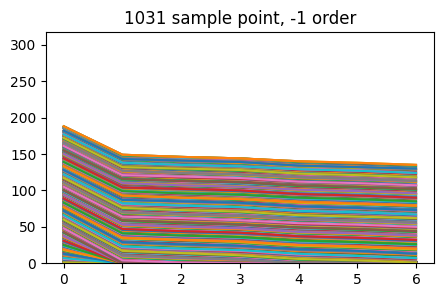

In [8]:
plt.figure(figsize=(5,3))
for idx, i in enumerate(sample_pts_flatt):
        plt.ylim([0,317])
        # plt.plot(back_peak_illum_idx[2,:,i]), plt.title('%d sample point, +1 order'%idx)
        plt.plot(back_peak_illum_idx[0,:,i]), plt.title('%d sample point, -1 order'%idx)
        # plt.plot(back_peak_illum_idx[1,:,i]), plt.title('%d sample point, 0 order'%idx)

#### Peak illum index Plotting

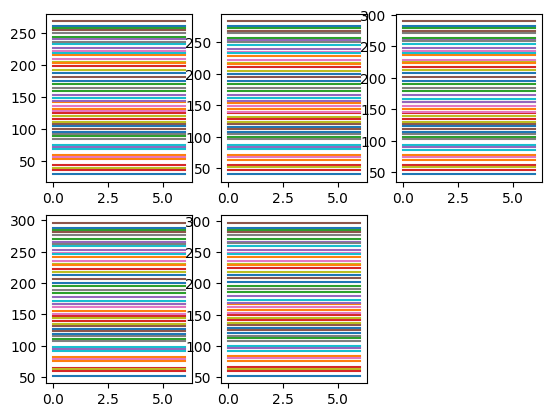

In [9]:
m_idx = 1
for i in range(0,len(sample_pts),20):
    plt.subplot(231), plt.plot(front_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(232), plt.plot(mid_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(233), plt.plot(mid2_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(234), plt.plot(mid3_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])
    plt.subplot(235), plt.plot(back_peak_illum_idx[m_idx,:,sample_pts_flatt[i]])

### Figure visualization

In [5]:
vis_wvl_idx = np.array([4,14,24,34,44])

In [48]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np
# %matplotlib inline 

# fig_width, fig_height = 8, 5
# depths = np.array([600, 650, 700, 750, 800, 850, 900])
# indices = np.array([0, 50, 100, 150, 200, 250, 300])  # Indices corresponding to the depths

# between_bar_padding = 0.85
# within_bar_padding = 0.8

# fig = plt.figure(figsize=(fig_width, fig_height))
# fig.set_facecolor('white')
# ax = fig.add_subplot()

# px_idx = 4

# ax.grid(axis='y', color = 'lightgray')
# ax.set_axisbelow(True)

# x_range = np.zeros(shape=(7, 5))
# for idx, depth in enumerate(depths):
#     # sub_category = depth_peak_illum_idx[indices[idx], 2, :, px_idx]
#     sub_category = first_illum_idx[vis_wvl_idx, indices[idx], sample_pts[px_idx, 1], sample_pts[px_idx, 0]]
    
#     num_sub_category = len(sub_category)
    
#     colors = sns.color_palette('hls',num_sub_category) 
#     tick_coord = idx  # x-coordinate based on the main category (depth)
#     # width = 1 / (num_sub_category) * between_bar_padding  # Adjusted width calculation
#     width = between_bar_padding / num_sub_category
    
#     for i in range(num_sub_category):
#         ax.bar(tick_coord + width * i, illum_proj_px[np.array(sub_category[i], dtype = np.int16)], width * within_bar_padding,
#                color=colors[i], label=f"Sub-{i} at {depth}")  # You can customize the label as needed
    
#         x_range[idx, i] = (tick_coord + width * i)
        
# plt.xticks(np.arange(len(depths)), depths)
# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.67))
# plt.xlabel('depth[mm]', fontsize=18)
# plt.ylabel('projector pixel[px]', fontsize=18)

# min = illum_proj_px[np.array(first_illum_idx[vis_wvl_idx, indices[idx], sample_pts[px_idx, 1], sample_pts[px_idx, 0]], dtype = np.int16)].min()
# max = illum_proj_px[np.array(first_illum_idx[vis_wvl_idx, indices[idx], sample_pts[px_idx, 1], sample_pts[px_idx, 0]], dtype = np.int16)].max()

# plt.ylim([300, 640])
# # plt.ylim(min - 100, np.max(max + 100, 640))
# # plt.savefig('fig03.png', format='png', dpi=300)

# # Add the dotted lines
# for i in range(len(vis_wvl_idx)):
#     # ax.plot(x_range[:, i], depth_peak_illum_idx[indices, 2, i, px_idx], '--', color=colors[i], label='Dotted Line 1')
#     ax.plot(x_range[:, i], illum_proj_px[np.array(first_illum_idx[vis_wvl_idx[i], indices, sample_pts[px_idx, 1], sample_pts[px_idx, 0]], dtype = np.int16)], '--', color=colors[i], label='Dotted Line 1')

# ax.tick_params(axis='both', which='major', labelsize=15, length = 0)
# plt.yticks(np.arange((min - 100) - (min - 100) % 10, (max + 100) - (max + 100) % 10, 50))
# plt.ylim([330, 640])
# plt.savefig('depth_dispersion.png')
# plt.show()

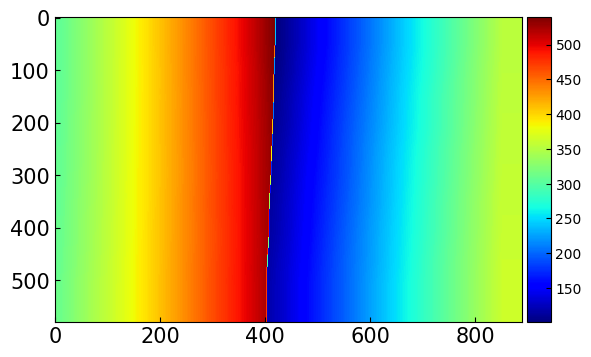

In [59]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable

# plt.figure()
# ax = plt.gca()
# im = ax.imshow(illum_proj_px[first_illum_idx[0, 100]], cmap = 'jet')
    
# # create an axes on the right side of ax. The width of cax will be 5%
# # of ax and the padding between cax and ax will be fixed at 0.05 inch.
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# ax.tick_params(axis='both', which='major', labelsize=15,direction='in')

# cbar = plt.colorbar(im, cax=cax)
# cbar.ax.tick_params(direction = 'in')

In [37]:
# mid3_peak_illum_idx

### Reprojection error calculation

In [5]:
depth_peak_illum_idx_image = np.load(os.path.join(npy_dir, 'depth_peak_illum_idx_image.npy'))

In [6]:
first_illum_idx_final_transp = np.load(os.path.join(npy_dir, 'first_illum_idx_final_transp_test_2.npy'))

#### Sample point new

In [7]:
sample_pts_new = np.load('./sample_pts_new.npy')

In [104]:
x_rand = np.random.randint(10, 850, 1032)
y_rand = np.random.randint(50, 510, 1032)
sample_pts_new = np.stack((x_rand, y_rand), axis = 1)

In [10]:
sample_pts_flatt_new = np.array([[sample_pts_new[i,0]+sample_pts_new[i,1]*cam_W] for i in range(sample_pts.shape[0])]).squeeze()

#### sample out points

In [8]:
depth_peak_illum_idx_image = depth_peak_illum_idx_image[:,:,:,sample_pts_new[:,1],sample_pts_new[:,0]]
# depth_peak_illum_idx_image = depth_peak_illum_idx_image[:,:,:,sample_pts[:,1],sample_pts[:,0]]

In [11]:
first_illum_idx_final_sample_pts = first_illum_idx_final_transp[:,calibration_wvls]
new_wvls[calibration_wvls]

# first_illum_idx_final_sample_pts = first_illum_idx_final_sample_pts[:,:,sample_pts_flatt]
first_illum_idx_final_sample_pts = first_illum_idx_final_sample_pts[:,:,sample_pts_flatt_new]

depth = (get_depth("mid2")*1e3).astype(np.int32)

#### Sample points

In [12]:
first_illum_idx_final_sample_pts_list = []
gt_peak_list = []
depth_peak_illum_idx_final_list = []

for pts_idx, pts in enumerate(sample_pts_flatt_new):
# for pts_idx, pts in enumerate(sample_pts_flatt):
    # Depth illum index for points
    gt_peak_list.append(mid2_peak_illum_idx[:,:,pts])
    first_illum_idx_final_sample_pts_list.append(first_illum_idx_final_sample_pts[np.where(depth_arange == depth[pts])[0][0],:,pts_idx])
    depth_peak_illum_idx_final_list.append(depth_peak_illum_idx_image[np.where(depth_arange == depth[pts])[0][0],:,:,pts_idx])
    
gt_peak_list = np.array(gt_peak_list)
first_illum_idx_final_sample_pts_list = np.array(first_illum_idx_final_sample_pts_list)
depth_peak_illum_idx_final_list = np.array(depth_peak_illum_idx_final_list)

In [13]:
gt_peak_list_final = np.zeros(shape = (len(sample_pts), len(wvl_list)))

mfirst_diff = abs(gt_peak_list[:,0,0] - gt_peak_list[:,0,-1])
pfirst_diff = abs(gt_peak_list[:,2,0] - gt_peak_list[:,2,-1])

mfirst_mask = mfirst_diff > pfirst_diff
pfirst_mask = mfirst_diff <= pfirst_diff

gt_peak_list_final[mfirst_mask] = gt_peak_list[:,0][mfirst_mask]
gt_peak_list_final[pfirst_mask] = gt_peak_list[:,2][pfirst_mask]

In [14]:
depth_peak_illum_idx_final_check = np.zeros(shape = (len(sample_pts), len(wvl_list)))

mfirst_diff = abs(depth_peak_illum_idx_final_list[:,0,0] - depth_peak_illum_idx_final_list[:,0,-1])
pfirst_diff = abs(depth_peak_illum_idx_final_list[:,2,0] - depth_peak_illum_idx_final_list[:,2,-1])

mfirst_mask = mfirst_diff > pfirst_diff
pfirst_mask = mfirst_diff <= pfirst_diff

depth_peak_illum_idx_final_check[mfirst_mask] = depth_peak_illum_idx_final_list[:,0][mfirst_mask]
depth_peak_illum_idx_final_check[pfirst_mask] = depth_peak_illum_idx_final_list[:,2][pfirst_mask]

In [47]:
# for i in range(0,len(sample_pts_flatt_new),50):
#     plt.figure()
#     plt.plot(gt_peak_list_final[i,0:3], label = 'gt')
#     plt.plot(depth_peak_illum_idx_final_check[i,1:3], label = 'estimated')
#     plt.legend()

In [31]:
gt_peak_list_final.shape

(1032, 7)

In [ ]:
for i in range(0,len(sample_pts_flatt_new),50):
    plt.figure()
    plt.plot(gt_peak_list_final[i,5:7], label = 'gt')
    plt.plot(first_illum_idx_final_sample_pts_list[i,5:7], label = 'estimated'), plt.title('%d'%i)
    plt.legend()

In [15]:
diff_430_depth = []
diff_660_depth = []
for i in range(0,len(sample_pts_flatt_new)):
    # print('430nm : ', abs(gt_peak_list_final[i,0] - depth_peak_illum_idx_final_check[i,0]))
    # print('660nm : ', abs(gt_peak_list_final[i,-1] - depth_peak_illum_idx_final_check[i,-1]))
    diff_430_depth.append(abs(gt_peak_list_final[i,0] - depth_peak_illum_idx_final_check[i,0]))
    diff_660_depth.append(abs(gt_peak_list_final[i,-1] - depth_peak_illum_idx_final_check[i,-1]))

In [16]:
diff_430_depth = np.array(diff_430_depth)
diff_660_depth = np.array(diff_660_depth)

In [17]:
np.argmax(diff_430_depth)

830

In [18]:
sample_pts_new[830]

array([402, 101])

In [19]:
diff_430_depth.max()

220.2011999850392

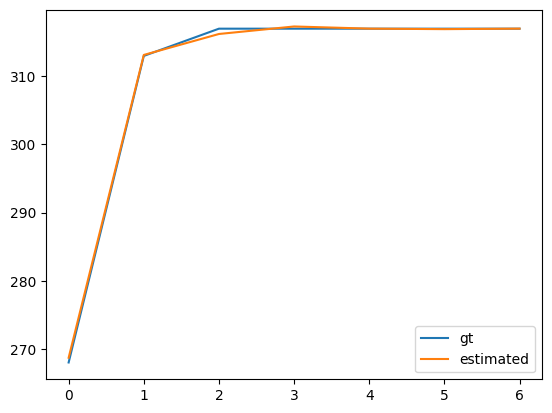

In [20]:
for i in range(511,512):
    plt.figure()
    plt.plot(gt_peak_list_final[i], label = 'gt')
    plt.plot(depth_peak_illum_idx_final_check[i], label = 'estimated')
    plt.legend()

In [21]:
diff_430_first = []
diff_660_first = []
for i in range(0,len(sample_pts_flatt_new)):
    # print('430nm : ', abs(gt_peak_list_final[i,0] - first_illum_idx_final_sample_pts_list[i,0]))
    # print('660nm : ', abs(gt_peak_list_final[i,-1] - first_illum_idx_final_sample_pts_list[i,-1]))
    diff_430_first.append(abs(gt_peak_list_final[i,0] - first_illum_idx_final_sample_pts_list[i,0]))
    diff_660_first.append(abs(gt_peak_list_final[i,-1] - first_illum_idx_final_sample_pts_list[i,-1]))

In [22]:
diff_430_first = np.array(diff_430_first)
diff_660_first = np.array(diff_660_first)

In [23]:
np.argmax(diff_660_first)

511

In [24]:
diff_430_first[511]

220.0

In [25]:
sample_pts_new[830]

array([402, 101])

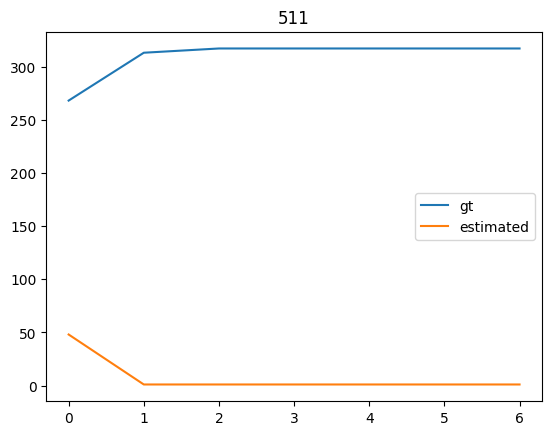

In [64]:
for i in range(511,512):
    plt.figure()
    plt.plot(gt_peak_list_final[i], label = 'gt')
    plt.plot(first_illum_idx_final_sample_pts_list[i], label = 'estimated'), plt.title('%d'%i)
    plt.legend()

In [48]:
abs(gt_peak_list_final - depth_peak_illum_idx_final_check).mean()

1.3035038925871716

In [49]:
diff = abs(gt_peak_list_final - first_illum_idx_final_sample_pts_list)
print(diff.mean())

1.803294573643411


In [18]:
np.sqrt((diff**2).mean())

0.9339333224164468

In [19]:
idx317 = np.where(gt_peak_list_final != 317.)

In [20]:
gt_peak_list_final[idx317[0],idx317[1]]

array([158., 198., 203., ..., 134., 132., 129.])

In [21]:
diff.max()

5.0

In [26]:
# center points for all patches 20231003
all_patches_center_pts = np.array([[200,160], [300,150], [418,142], [533,133],[651, 129], [770,100],
                                    [200,276], [308,267], [420,260], [537,251], [655,245], [780,237],
                                    [202,386], [310,382], [420,375], [540,375], [660,368], [780,360],
                                    [200,500], [300,490], [420,500], [540,500], [660,490], [790,480]])

In [27]:
sample_pts[703], sample_pts_flatt[18]

(array([310, 370]), 44870)

In [28]:
idx = 448
first_illum_idx_final_sample_pts_list[idx], gt_peak_list_final[idx]

(array([258, 302, 305, 307, 312, 315, 315], dtype=int16),
 array([258., 301., 305., 308., 312., 315., 317.]))

In [29]:
np.where(first_illum_idx_final_sample_pts_list == 305.)[0]

array([  16,   17,   60,  104,  188,  274,  319,  362,  405,  448,  489,
        532,  575,  619,  662,  705,  748,  749,  792,  835,  836,  878,
        879,  922,  963,  965, 1006], dtype=int64)

In [30]:
gt_peak_list_final[61, 2], first_illum_idx_final_sample_pts_list[61,2]

(309.0, 308)

In [31]:
# depth_peak_illum_idx_image_1 = np.zeros(shape=(len(depth_arange), len(self.sample_pts), len(self.wvl_list)))

# mfirst_diff = abs(depth_peak_illum_idx_image[:,0,0,self.sample_pts[:,1],self.sample_pts[:,0]] - depth_peak_illum_idx_image[:,0,-1, self.sample_pts[:,1], self.sample_pts[:,0]])
# pfirst_diff = abs(depth_peak_illum_idx_image[:,2,0,self.sample_pts[:,1],self.sample_pts[:,0]] - depth_peak_illum_idx_image[:,2,-1, self.sample_pts[:,1], self.sample_pts[:,0]])

# # make 7 wvl
# mfirst_mask = mfirst_mask[:,np.newaxis,:]
# pfirst_mask = pfirst_mask[:,np.newaxis,:]

# mfirst_mask = np.repeat(mfirst_mask, 7, axis=1)
# pfirst_mask = np.repeat(pfirst_mask, 7, axis=1)

# mfirst_mask = mfirst_diff > pfirst_diff
# pfirst_mask = mfirst_diff <= pfirst_diff

# depth_peak_illum_idx_image_1[mfirst_mask] = depth_peak_illum_idx_image[:,0,:,self.sample_pts[:,1],self.sample_pts[:,0]][mfirst_mask]
# depth_peak_illum_idx_image_1[pfirst_mask] = depth_peak_illum_idx_image[:,2,:,self.sample_pts[:,1],self.sample_pts[:,0]][pfirst_mask]

In [22]:
###
depth_peak_illum_idx_image_final = np.load(os.path.join(npy_dir, 'depth_peak_illum_idx_image_final.npy'))

In [23]:
depth_peak_illum_idx_image_final.shape, first_illum_idx_final_sample_pts.shape

((301, 2, 7, 580, 890), (301, 7, 1032))

In [24]:
depth_peak_illum_idx_image_final = depth_peak_illum_idx_image_final[:,1,:,sample_pts[:,1],sample_pts[:,0]].transpose(1,2,0)

In [25]:
depth_peak_illum_idx_image_final.shape, first_illum_idx_final_sample_pts.shape

((301, 7, 1032), (301, 7, 1032))

In [26]:
abs(depth_peak_illum_idx_image_final - first_illum_idx_final_sample_pts).mean()

0.6000374793385181

In [27]:
first_illum_idx_final_sample_pts[100,0].shape

(1032,)